In [2]:
import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension()

# make plots static
%matplotlib inline

In [10]:
df = pd.DataFrame({'Wine':['Vermentino 2017', 'Ronco Broilo' ,'Weisser Schiefer s 2017', 'Chardonnay 2018', 'Maganza Zibibbo 2018', 'Catarratto 2019', 'Kalk & Stein 2017', 'Safari Pecorino 2017', 
                             'Chardonnay 2019', 'Safari Pecorino 2017', 'Maganza Zibibbo 2018', 'Chardonnay 2018', 'Weisser Schiefer s 2017', 'Meursault Blanc 2017', 'Doria 2017', 'Catarratto 2019',
                            'Maganza Zibibbo 2018', 'Kalk & Stein 2017', 'Ronco Broilo', 'Chardonnay 2019', 'Vermentino 2017', 'Ronco Broilo', 'Meursault Blanc 2017'], 
                   'Rating':[3.1, 4.5, 3.8, 3.7, 4.3, 4.5, 3, 2.9, 
                             3.4, 4.2, 4.1, 3.8, 3.6, 4.0, 4.4, 3.5,
                            3.8, 4.4, 3.0, 4.3, 4.0, 3.8, 3.7]})


In [37]:
class RatingsDashboard(param.Parameterized):
    
    Wine = param.ObjectSelector(default='Vermentino 2017', objects=list(df.Wine.unique()))
    
    
    def get_data(self):
        class_df = df[(df.Wine==self.Wine)].copy()
        return class_df
    

    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot(data['Rating'], color = '#57c49f')
        plt.close()
        return ax.figure
    
    def bar_view(self):
        data = self.get_data() 
        ax = sns.countplot(data['Rating'], palette = ['#323232', '#fee0cf', '#47a2c6'])
        plt.close()
        return ax.figure
    
    #https://logo-colors.com/ this is the website that I used when I was finding brand logo colors.
    
    
    def table_view(self):
        data = self.get_data()
        return data


/Users/misokim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/misokim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/misokim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn


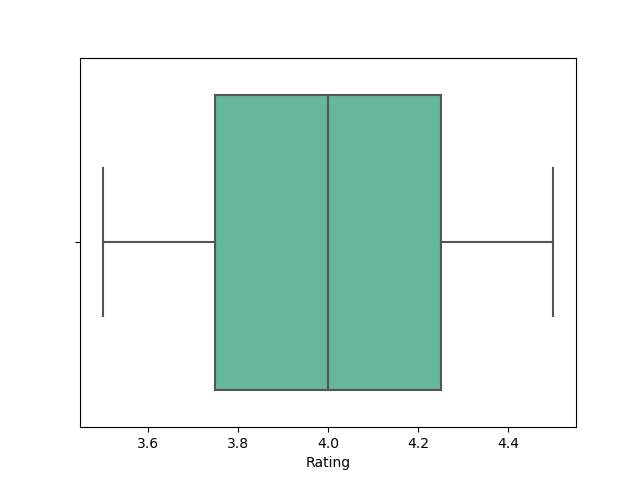
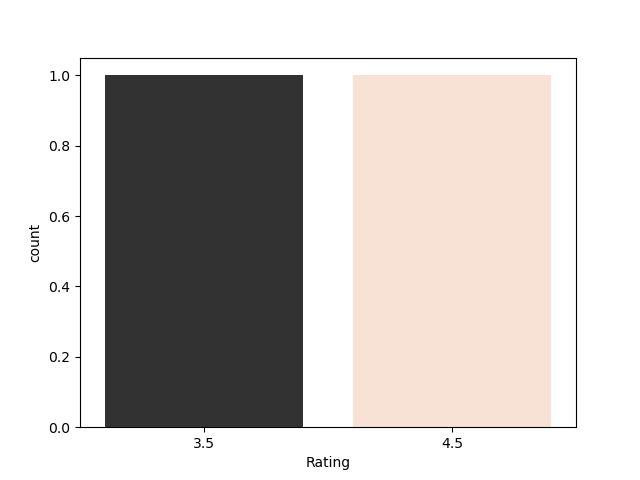
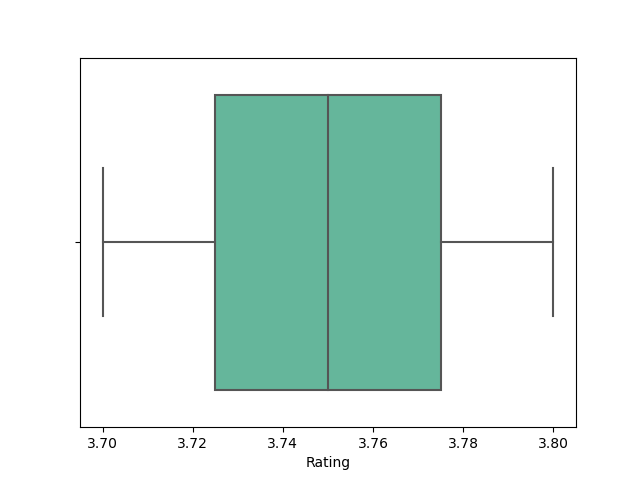
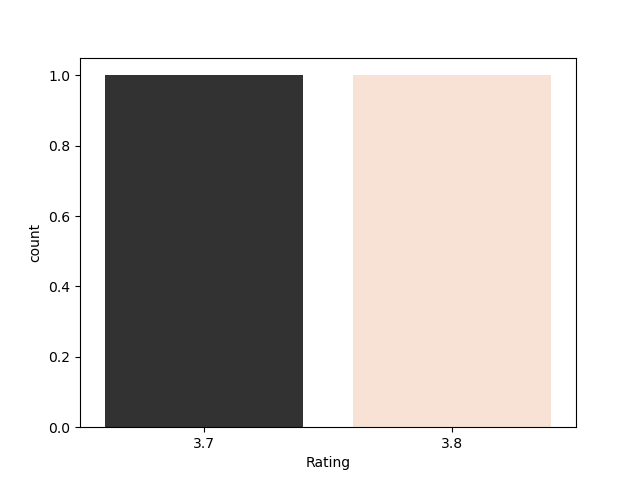
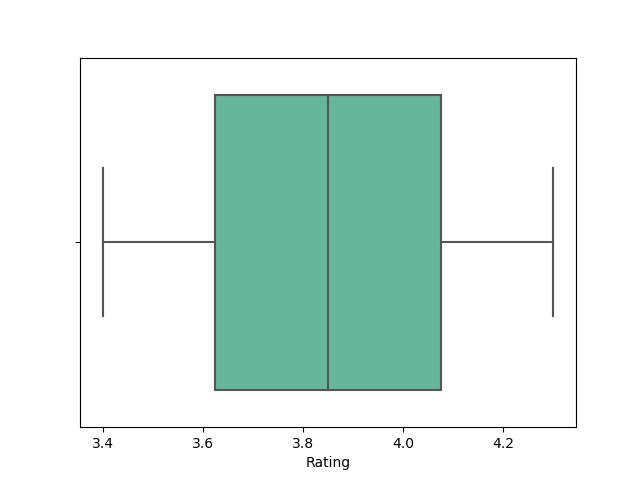
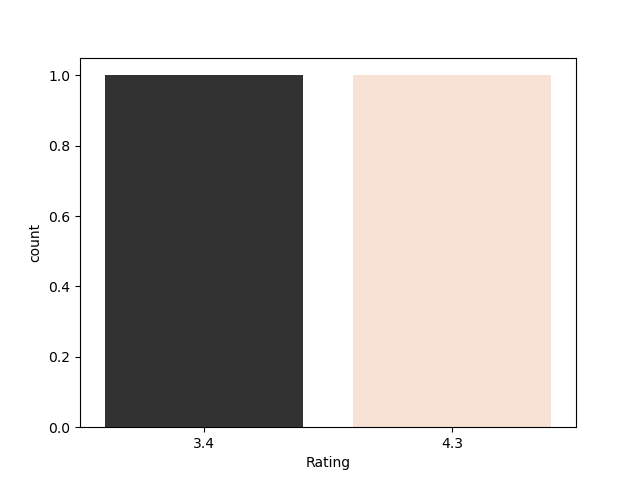
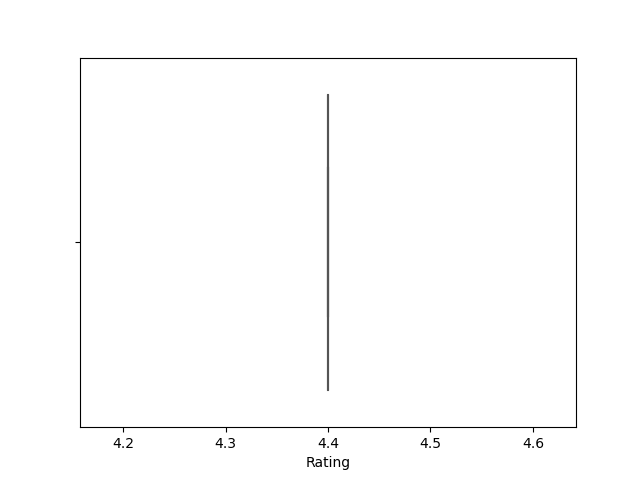
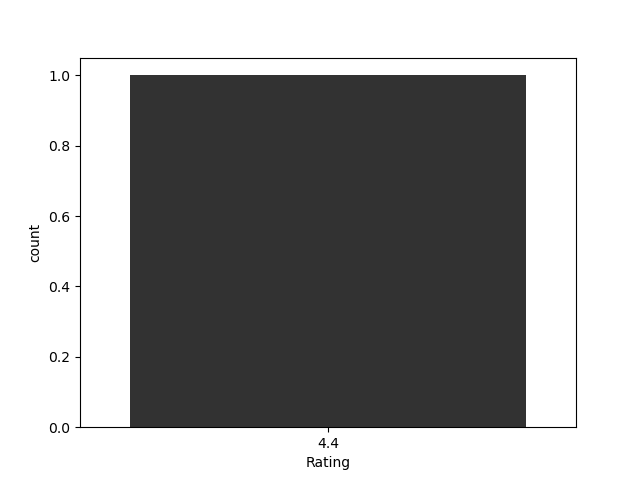
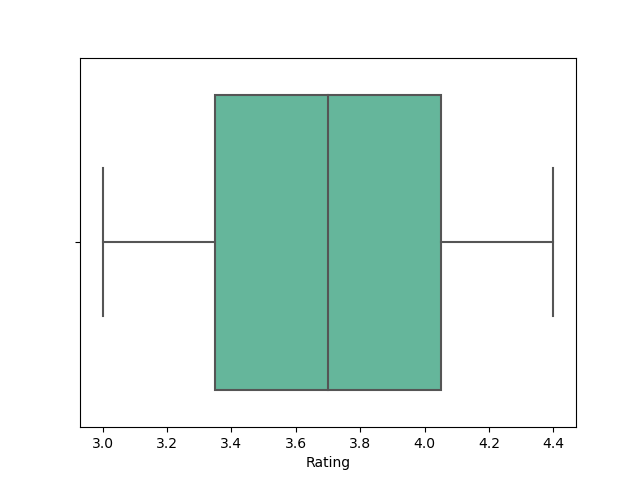
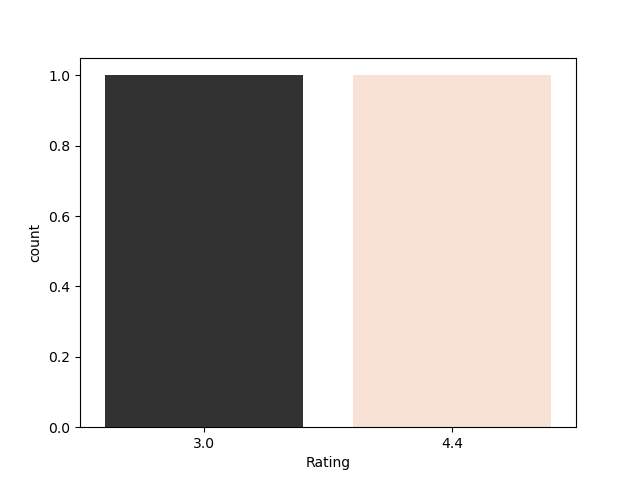
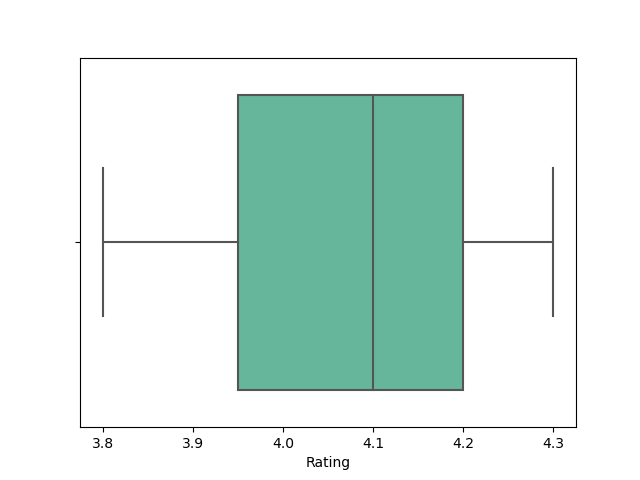
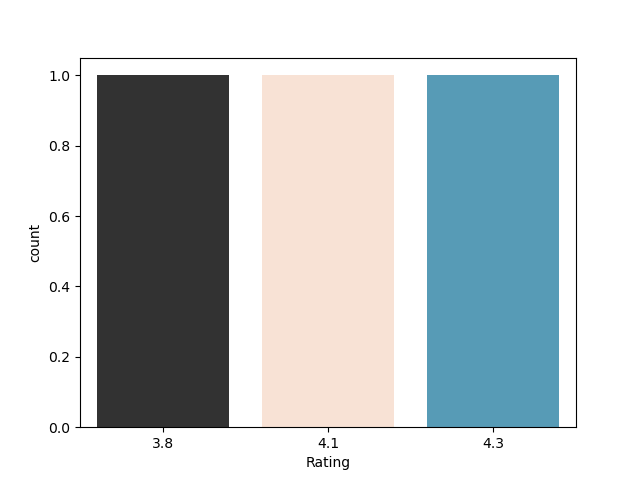
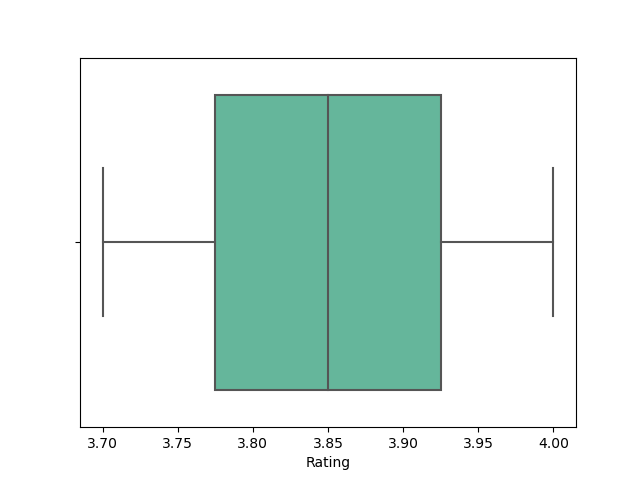
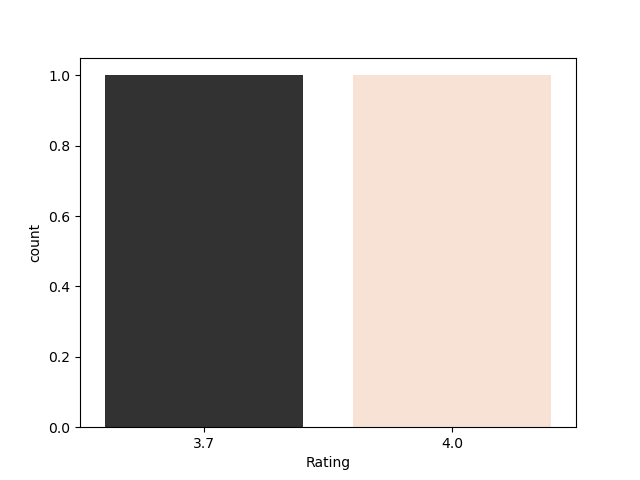
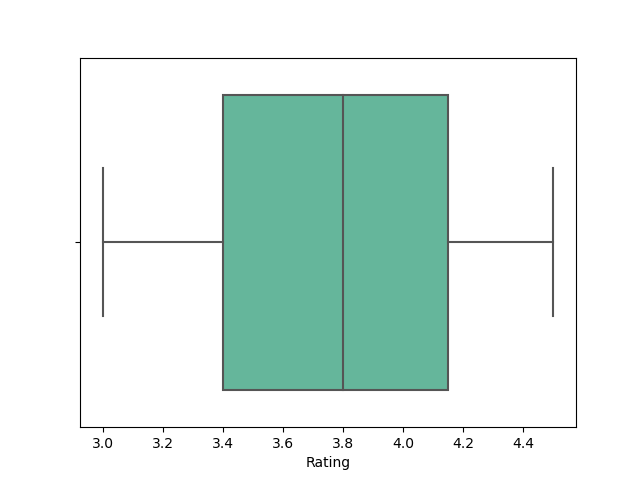
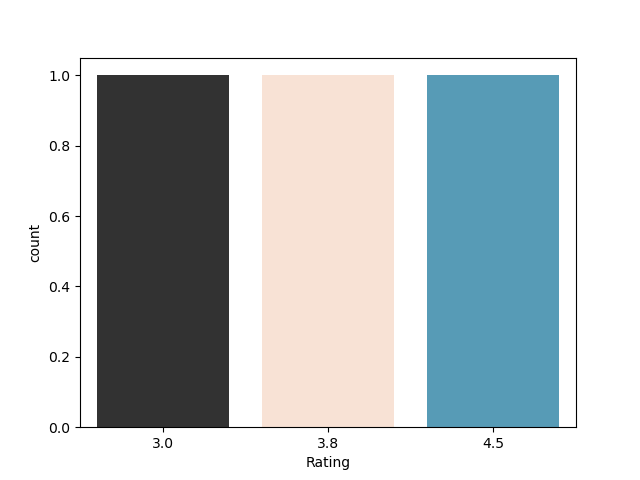
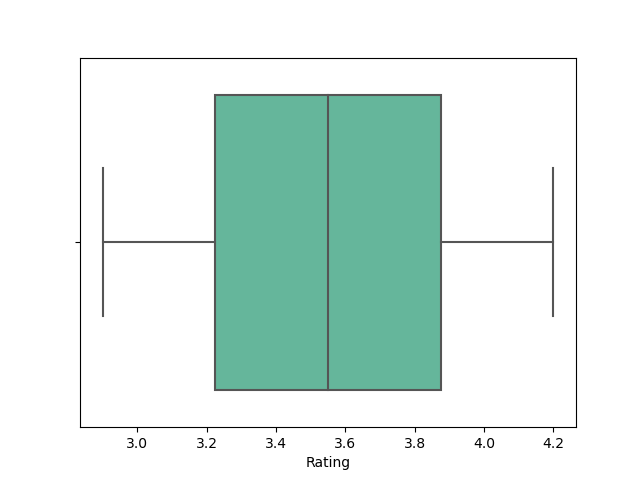
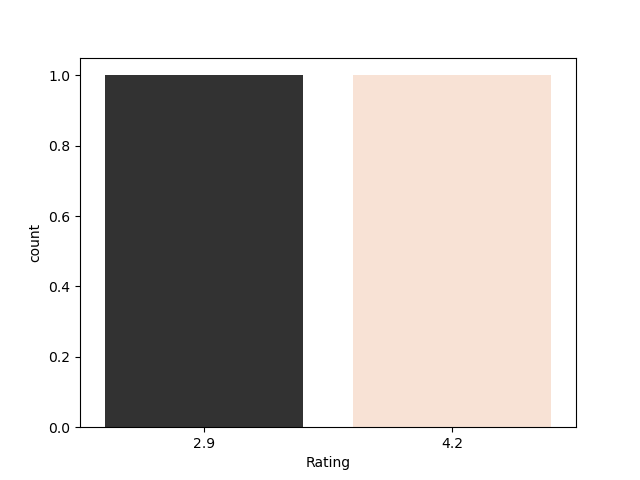
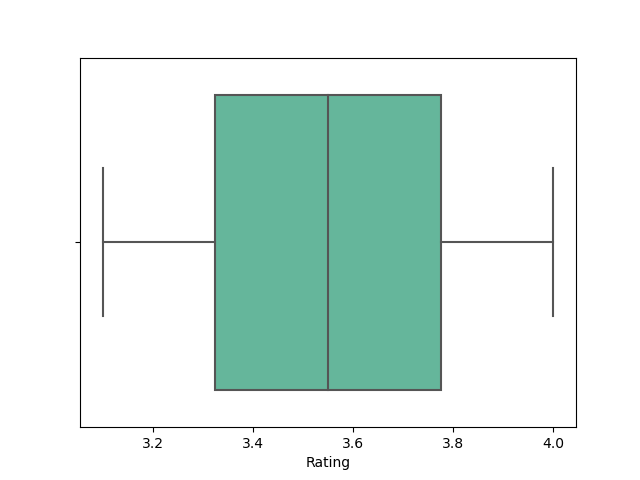
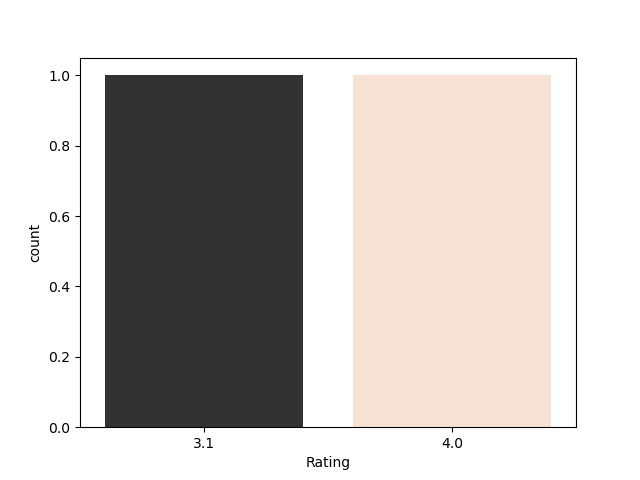
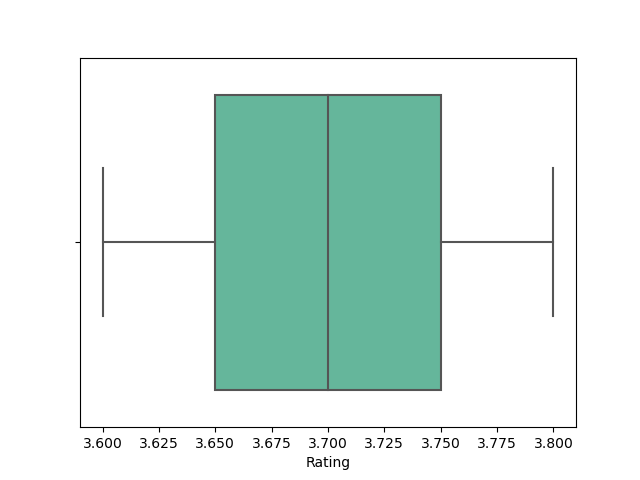
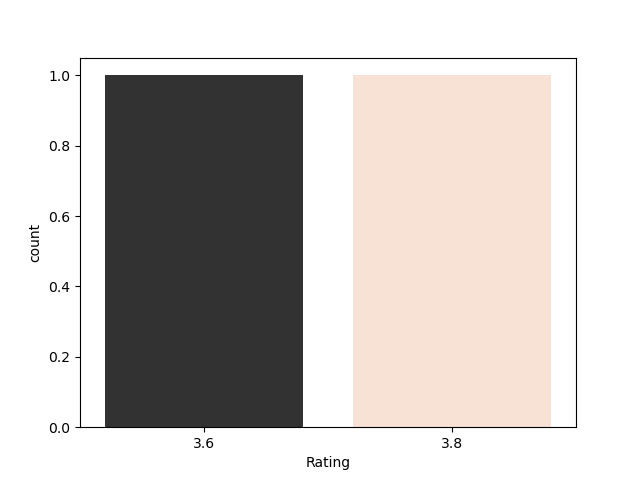
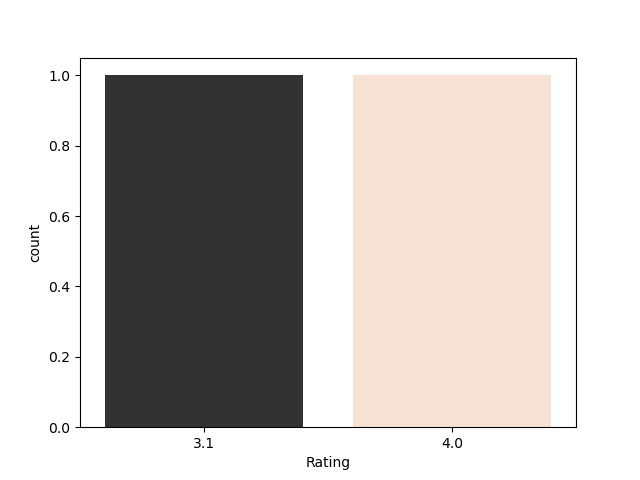
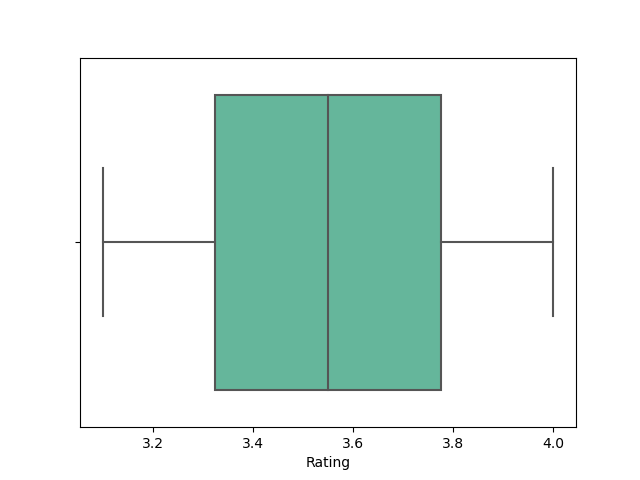

In [38]:
rd = RatingsDashboard(name='')

dashboard_title = '# White Wine Rating Dashboard'

dashboard_desc = 'An example of dashboard using a white wine ratings.'

dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       
                      rd.box_view,    
                      rd.bar_view,
                      rd.table_view
                     )

dashboard.embed(max_opts = 5)
